SQL Lite HW, Danella Lei Romera -
computing ID: tzb5xh

1. Set Up the Database

In [ ]:
import sqlite3

connection = sqlite3.connect("student_grades.db")

print("Database created and connected!")

Database created and connected!


In [ ]:
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


2. Create the Necessary Tables

In [34]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Tables created!")

Tables created!


3. Insert Data into the Tables

In [35]:
student_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name)
VALUES (?, ?)
''', student_data)

connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [36]:
grade_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 92),
    (3, 'English', 90),
    (3, 'History', 88),
    (4, 'Math', 78),
    (4, 'English', 85),
    (4, 'History', 76),
    (5, 'Math', 90),
    (5, 'English', 88),
    (5, 'History', 92)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade)
VALUES (?, ?, ?)
''', grade_data)

connection.commit()
print("Data inserted into the grades table!")

Data inserted into the grades table!


4. Perform SQL Queries

In [37]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()

print("Students and their ")
for row in joined_data:
    print(row)


Students and their 
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 92)
('Carol', 'White', 'English', 90)
('Carol', 'White', 'History', 88)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 85)
('David', 'Brown', 'History', 76)
('Eve', 'Davis', 'Math', 90)
('Eve', 'Davis', 'English', 88)
('Eve', 'Davis', 'History', 92)


In [40]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name, students.last_name
''')

average_grade = cursor.fetchall()

print("Students and their average grades:")
for row in average_grade:
    print(row)

Students and their average grades:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 90.0)
('David', 'Brown', 79.66666666666667)
('Eve', 'Davis', 90.0)


In [42]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
ORDER BY average_grade DESC
''')

row = cursor.fetchone()

top_average_grade = {
    'first_name': row[0],
    'last_name': row[1],
    'average_grade': row[2]
}

print("Student with the highest average grade:")
print(top_average_grade)

Student with the highest average grade:
{'first_name': 'Alice', 'last_name': 'Johnson', 'average_grade': 91.0}


In [43]:
cursor.execute('''
SELECT AVG(grades.grade) AS average_grade
FROM grades
WHERE grades.subject = 'Math'
''')

row = cursor.fetchone()

print("Average grade in Math:")
print(row)

Average grade in Math:
(87.4,)


In [47]:
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90;
''')

high_grade_students = cursor.fetchall()

row = cursor.fetchone()

print("Students with grades above 90:")
for row in high_grade_students:
    print(row)

Students with grades above 90:
('Alice', 'Johnson')
('Carol', 'White')
('Eve', 'Davis')


5. Load Data into Pandas

In [48]:
import pandas as pd

students_df = pd.read_sql_query("SELECT * FROM students", connection)
students_df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [49]:
join = '''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
'''

final_df = pd.read_sql_query(join, connection)

print(final_df)

   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     92
7       Carol     White  English     90
8       Carol     White  History     88
9       David     Brown     Math     78
10      David     Brown  English     85
11      David     Brown  History     76
12        Eve     Davis     Math     90
13        Eve     Davis  English     88
14        Eve     Davis  History     92


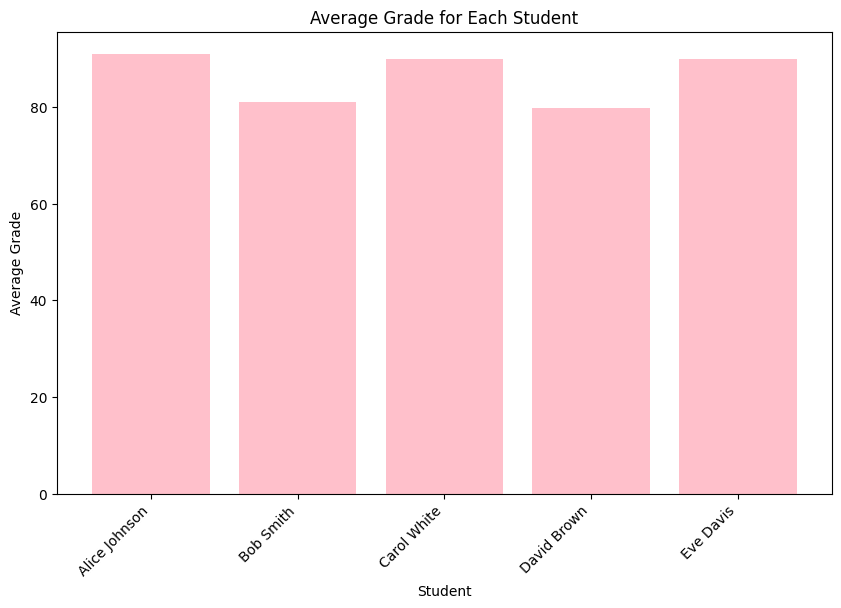

In [52]:
import matplotlib.pyplot as plt

students_avg = '''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
'''

df_students_avg = pd.read_sql_query(students_avg, connection)

plt.figure(figsize = (10,6))
plt.bar(df_students_avg['first_name'] + ' ' + df_students_avg['last_name'], df_students_avg['average_grade'], color = 'pink')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Student')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

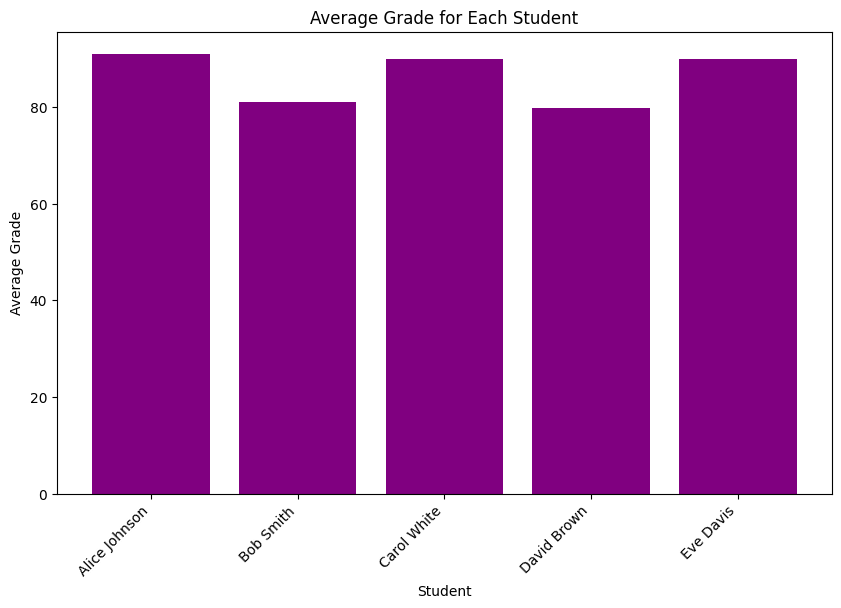

In [56]:
import matplotlib.pyplot as plt

students_avg = '''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
'''

df_students_avg = pd.read_sql_query(students_avg, connection)

plt.figure(figsize = (10,6))
plt.bar(df_students_avg['first_name'] + ' ' + df_students_avg['last_name'], df_students_avg['average_grade'], color = 'purple')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Student')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Students with the highest grade in each subject:
('Carol', 'White', 'English', 90)
('Eve', 'Davis', 'History', 92)
('Alice', 'Johnson', 'Math', 95)


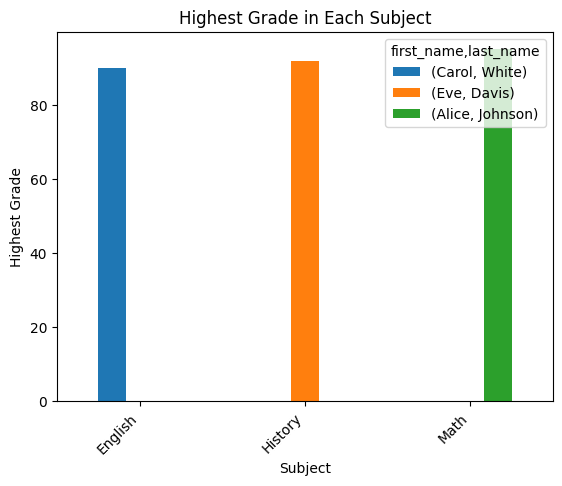

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

cursor.execute('''
SELECT s.first_name, s.last_name, g.subject, MAX(g.grade) AS highest_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY g.subject
''')

highest_grade_students = cursor.fetchall()

print("Students with the highest grade in each subject:")
for row in highest_grade_students:
    print(row)

highest_grade_df = pd.read_sql_query('''
SELECT s.first_name, s.last_name, g.subject, MAX(g.grade) AS highest_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY g.subject
''', connection)

highest_grade_df.pivot(index='subject', columns=['first_name', 'last_name'], values='highest_grade').plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Highest Grade')
plt.title('Highest Grade in Each Subject')
plt.xticks(rotation=45, ha='right')
plt.show()
